In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

15.622154932204268 50.95865592347121
-7.441078304311944 -133.66147731155684
-14.037158470506597 -41.4652819646202
75.72956196500041 -2.1249584626346234
17.960711826297086 132.233316983372
-10.19592668541705 174.26616114780774
-34.06224780877626 83.86635910870677
-30.550306596144395 -131.48829397141452
12.552376207830406 -32.625474717390546
-47.013575183506106 -91.83387073206363
39.28165962707783 -147.00386030443542
50.221048244164166 19.018451132743422
70.44268571705521 73.90022413866458
70.47671529745031 118.07212622119681
36.227382097579124 99.28208700618785
28.608527724944395 -107.81028520424931
-62.672342660895865 -49.945492437869575
53.80032858552636 -82.48329765883801
81.99849665198983 -118.63903405555891
-50.33516375911171 12.080968912419621
-28.893524102037567 157.48732404178645
-0.12739863307672294 12.319117699749427
-87.88601564613103 12.929802838148248
10.435949156685808 -102.03148931817063
-60.66844634800442 -3.2747110083035693
87.01901531920205 -110.63742125240402
82.27434

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f3958889136524e4728d9e9b1249cc9


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | salalah
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | tanhacu
Processing Record 4 of Set 1 | klaksvik
Processing Record 5 of Set 1 | alugan
Processing Record 6 of Set 1 | lolua
City not found. Skipping...
Processing Record 7 of Set 1 | bambous virieux
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | sao filipe
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | kodiak
Processing Record 12 of Set 1 | katowice
Processing Record 13 of Set 1 | pangody
Processing Record 14 of Set 1 | saskylakh
Processing Record 15 of Set 1 | xining
Processing Record 16 of Set 1 | adolfo lopez mateos
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 19 of Set 1 | norman wells
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | byron bay
Processing Record 22

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Salalah,17.0151,54.0924,77.70,93,100,7.31,OM,2022-07-19 15:00:48
1,Atuona,-9.8000,-139.0333,77.41,62,98,13.15,PF,2022-07-19 15:00:48
2,Tanhacu,-14.0214,-41.2481,79.81,45,6,8.61,BR,2022-07-19 15:00:49
3,Klaksvik,62.2266,-6.5890,52.72,95,100,12.86,FO,2022-07-19 15:00:49
4,Alugan,12.2188,125.4808,82.18,81,23,8.81,PH,2022-07-19 15:00:50
5,Bambous Virieux,-20.3428,57.7575,70.21,69,21,25.01,MU,2022-07-19 15:00:50
6,Rikitea,-23.1203,-134.9692,73.90,72,2,9.40,PF,2022-07-19 15:00:50
7,Sao Filipe,14.8961,-24.4956,78.04,82,76,8.14,CV,2022-07-19 14:53:23
8,Castro,-24.7911,-50.0119,71.91,62,7,3.18,BR,2022-07-19 15:00:52
9,Kodiak,57.7900,-152.4072,50.45,88,100,2.21,US,2022-07-19 15:00:52


In [25]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [26]:
city_data_df=city_data_df[new_column_order]

In [27]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Salalah,OM,2022-07-19 15:00:48,17.0151,54.0924,77.70,93,100,7.31
1,Atuona,PF,2022-07-19 15:00:48,-9.8000,-139.0333,77.41,62,98,13.15
2,Tanhacu,BR,2022-07-19 15:00:49,-14.0214,-41.2481,79.81,45,6,8.61
3,Klaksvik,FO,2022-07-19 15:00:49,62.2266,-6.5890,52.72,95,100,12.86
4,Alugan,PH,2022-07-19 15:00:50,12.2188,125.4808,82.18,81,23,8.81
5,Bambous Virieux,MU,2022-07-19 15:00:50,-20.3428,57.7575,70.21,69,21,25.01
6,Rikitea,PF,2022-07-19 15:00:50,-23.1203,-134.9692,73.90,72,2,9.40
7,Sao Filipe,CV,2022-07-19 14:53:23,14.8961,-24.4956,78.04,82,76,8.14
8,Castro,BR,2022-07-19 15:00:52,-24.7911,-50.0119,71.91,62,7,3.18
9,Kodiak,US,2022-07-19 15:00:52,57.7900,-152.4072,50.45,88,100,2.21


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [32]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1658254316.6790829

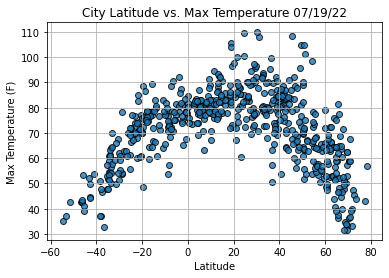

In [36]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

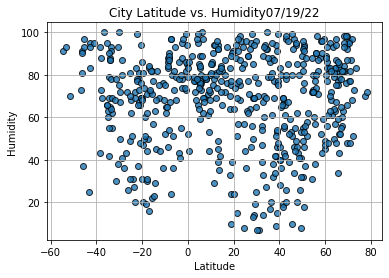

In [38]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity" + time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

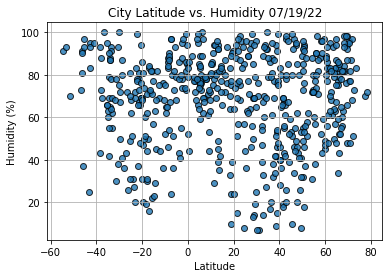

In [39]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

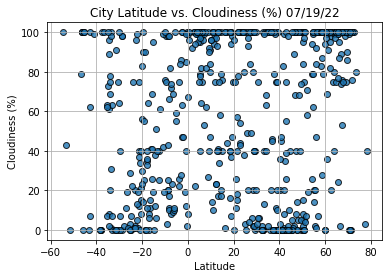

In [40]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

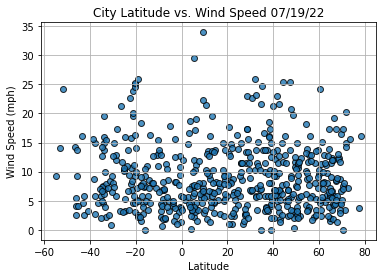

In [41]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()